Проект модуля #3
# Дашборд конверсий
Аналитик данных

# Шаг 1
## Подготовка к работе с данными

Загрузите данные по рекламам из csv

In [520]:
%%time
import pandas as pd
import requests
import matplotlib.pyplot as plt
from matplotlib.dates import WeekdayLocator, MONDAY
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import numpy as np

CPU times: user 30 µs, sys: 1 µs, total: 31 µs
Wall time: 36 µs


In [521]:
%%time
from io import StringIO

response = requests.get('https://drive.google.com/uc?id=1pwrFxZKf-fNiFwv8DIzt5bNhlzcxvmcz')
csv_data = StringIO(response.text)

df_ads = pd.read_csv(csv_data)

df_ads.head()

CPU times: user 98.8 ms, sys: 7.27 ms, total: 106 ms
Wall time: 1.24 s


,date,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01T09:16:57,google,cpc,virtual_reality_workshop,238
1,2023-03-02T12:48:25,google,cpc,virtual_reality_workshop,164
2,2023-03-03T13:39:30,google,cpc,virtual_reality_workshop,240
3,2023-03-04T16:42:54,google,cpc,virtual_reality_workshop,167
4,2023-03-05T03:58:19,google,cpc,virtual_reality_workshop,268


Изучите данные, сделайте предварительный анализ с помощью dataframe.describe

In [522]:
df_ads.describe(include='all')

,date,utm_source,utm_medium,utm_campaign,cost
count,180,180,180,180,180.000000
unique,180,4,2,5,NaN
top,2023-03-01T09:16:57,yandex,cpc,cybersecurity_special,NaN
freq,1,79,115,43,NaN
mean,NaN,NaN,NaN,NaN,192.533333
std,NaN,NaN,NaN,NaN,57.017335
min,NaN,NaN,NaN,NaN,100.000000
25%,NaN,NaN,NaN,NaN,143.750000
50%,NaN,NaN,NaN,NaN,181.500000
75%,NaN,NaN,NaN,NaN,241.250000


Визиты из CSV

In [523]:
df_visits_csv = pd.read_csv("https://drive.google.com/uc?id=1QosQQ4RRNR9rkL4t7sB707h2Uy0XfYJe")

df_visits_csv.head()


,uuid,platform,user_agent,date
0,1de9ea66-70d3-4a1f-8735-df5ef7697fb9,web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,2023-03-01T13:29:22
1,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-01T16:44:28
2,f149f542-e935-4870-9734-6b4501eaf614,web,Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,2023-03-06T06:12:36
3,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-03-01T20:16:37
4,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1,web,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2023-03-05T17:42:47


In [524]:
df_visits_csv.describe(include='all')

,uuid,platform,user_agent,date
count,1000,1000,1000,1000
unique,519,3,28,996
top,251a0926-ece3-4d77-aa42-ab569fdf9fe2,web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2023-03-01T08:01:45
freq,4,954,71,2


Регистрации из CSV

In [525]:
df_registrations_csv = pd.read_csv("https://drive.google.com/uc?id=1AeQz0kaSgz0lxYSDtuNm36muhy5fRCzZ")

df_registrations_csv.head()

,date,user_id,email,platform,registration_type
0,2023-03-01T00:25:39,8838849,joseph95@example.org,web,google
1,2023-03-01T14:53:01,8741065,janetsuarez@example.net,web,yandex
2,2023-03-01T14:27:36,1866654,robert67@example.org,web,google
3,2023-03-01T02:42:34,1577584,elam@example.net,web,apple
4,2023-03-01T10:27:14,4765395,stephanie68@example.net,web,yandex


In [526]:
df_registrations_csv.describe(include='all')

,date,user_id,email,platform,registration_type
count,1000,1.000000e+03,1000,1000,1000
unique,1000,NaN,997,3,4
top,2023-03-01T00:25:39,NaN,zanderson@example.org,android,email
freq,1,NaN,2,517,446
mean,NaN,4.488623e+06,NaN,NaN,NaN
std,NaN,2.620568e+06,NaN,NaN,NaN
min,NaN,2.236800e+04,NaN,NaN,NaN
25%,NaN,2.235489e+06,NaN,NaN,NaN
50%,NaN,4.473044e+06,NaN,NaN,NaN
75%,NaN,6.779707e+06,NaN,NaN,NaN


# Шаг 2
## Запросы к API
Запросите данные по API за период 2023-03-01 -> 2023-09-01

Визиты

In [527]:
START = "2023-03-01"
END = "2023-09-01"

In [528]:
%%time

response = requests.get(f"https://data-charts-api.hexlet.app/visits?begin={START}&end={END}")

data = response.json()

df_visits = pd.DataFrame(data)

df_visits.head()

CPU times: user 624 ms, sys: 185 ms, total: 809 ms
Wall time: 10 s


,datetime,platform,user_agent,visit_id
0,"Wed, 01 Mar 2023 23:17:37 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
1,"Sat, 04 Mar 2023 03:23:34 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1de9ea66-70d3-4a1f-8735-df5ef7697fb9
2,"Wed, 01 Mar 2023 12:57:13 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,f149f542-e935-4870-9734-6b4501eaf614
3,"Wed, 01 Mar 2023 13:07:19 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1
4,"Sun, 05 Mar 2023 22:02:39 GMT",web,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,08f0ebd4-950c-4dd9-8e97-b5bdf073eed1


In [529]:
df_visits.describe(include='all')

,datetime,platform,user_agent,visit_id
count,308871,308871,308871,308871
unique,303530,4,32,170101
top,"Tue, 14 Mar 2023 13:31:26 GMT",web,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,5f260cd8-3c51-41fe-a394-8f5213d58793
freq,4,278078,15679,4


Регистрации

In [530]:
%%time

response = requests.get(f"https://data-charts-api.hexlet.app/registrations?begin={START}&end={END}")

data = response.json()

df_registrations = pd.DataFrame(data)

df_registrations.head()

CPU times: user 123 ms, sys: 9.04 ms, total: 132 ms
Wall time: 758 ms


,datetime,email,platform,registration_type,user_id
0,"Wed, 01 Mar 2023 13:21:20 GMT",jlane@example.net,web,google,8dd9b457-f02e-4cff-a66a-d70838849f04
1,"Wed, 01 Mar 2023 01:14:06 GMT",dyerkenneth@example.net,web,yandex,52e2b626-c6fa-4919-a67d-09adb33accdc
2,"Wed, 01 Mar 2023 19:47:32 GMT",kwade@example.com,web,yandex,bab974bd-2176-4497-acb2-4bc61ca93f5c
3,"Wed, 01 Mar 2023 19:19:26 GMT",fisherbrian@example.net,web,email,b517892a-15c0-4320-9f33-e65db1110395
4,"Wed, 01 Mar 2023 02:30:54 GMT",johngomez@example.org,web,google,bd38427f-7120-4c14-a384-889a2335108b


In [531]:
%%time

df_registrations.describe(include='all')

CPU times: user 37.5 ms, sys: 1.17 ms, total: 38.7 ms
Wall time: 40.3 ms


,datetime,email,platform,registration_type,user_id
count,28197,28197,28197,28197,28197
unique,28143,26707,3,4,28197
top,"Tue, 14 Mar 2023 18:21:50 GMT",yjones@example.net,android,email,8dd9b457-f02e-4cff-a66a-d70838849f04
freq,2,6,13760,11977,1


# Шаг 3

## Расчет метрик

Сгруппируйте данные визитов по датам и платформам

In [532]:
%%time

response = requests.get(f"https://data-charts-api.hexlet.app/visits?begin={START}&end={END}")
data = response.json()

df_visits = pd.DataFrame(data)

df_visits['datetime'] = pd.to_datetime(df_visits['datetime'])

idx = df_visits.groupby('visit_id')['datetime'].idxmax()

df_filtered_visits = df_visits.loc[idx]

df_filtered_visits = df_filtered_visits[~df_filtered_visits['user_agent'].str.contains('bot', case=False)]

df_filtered_visits['datetime'] = df_filtered_visits['datetime'].dt.strftime('%Y-%m-%d')

df_grouped = df_filtered_visits.groupby(['datetime', 'platform']).size().reset_index(name='visits')

df_grouped.columns = ['date_group', 'platform', 'visits']

df_visit_grouped = df_grouped.sort_values(by='date_group')

df_visit_grouped.head()

CPU times: user 4.32 s, sys: 126 ms, total: 4.45 s
Wall time: 8.61 s


,date_group,platform,visits
0,2023-03-01,android,264
1,2023-03-01,ios,78
2,2023-03-01,web,333
3,2023-03-02,android,106
4,2023-03-02,ios,103


In [533]:
df_visit_grouped.describe(include='all')

,date_group,platform,visits
count,552,552,552.000000
unique,184,3,NaN
top,2023-03-01,android,NaN
freq,3,184,NaN
mean,NaN,NaN,295.528986
std,NaN,NaN,524.904616
min,NaN,NaN,1.000000
25%,NaN,NaN,28.000000
50%,NaN,NaN,73.500000
75%,NaN,NaN,397.500000


Сгруппируйте также данные регистраций по датам и платформам

In [534]:
%%time
response = requests.get(f"https://data-charts-api.hexlet.app/registrations?begin={START}&end={END}")
data = response.json()

df_registrations = pd.DataFrame(data)

df_registrations['date_group'] = pd.to_datetime(df_registrations['datetime']).dt.strftime('%Y-%m-%d')

df_grouped = df_registrations.groupby(['date_group', 'platform']).size().reset_index(name='registrations')

df_registrations_grouped = df_grouped.sort_values(by=['date_group'])

df_registrations_grouped.head()

CPU times: user 202 ms, sys: 15.6 ms, total: 218 ms
Wall time: 1.59 s


,date_group,platform,registrations
0,2023-03-01,android,218
1,2023-03-01,ios,67
2,2023-03-01,web,78
3,2023-03-02,android,91
4,2023-03-02,ios,76


In [535]:
df_registrations_grouped.describe(include='all')

,date_group,platform,registrations
count,552,552,552.000000
unique,184,3,NaN
top,2023-03-01,android,NaN
freq,3,184,NaN
mean,NaN,NaN,51.081522
std,NaN,NaN,58.226127
min,NaN,NaN,1.000000
25%,NaN,NaN,17.000000
50%,NaN,NaN,31.000000
75%,NaN,NaN,63.000000


Объедините датайфреймы, сделайте итоговый датафрейм с расчетом конверсии

Сохраните датафрейм в формате JSON conversion.json

In [536]:
%%time
result_df = pd.merge(df_visit_grouped, df_registrations_grouped, on=['date_group', 'platform'], how='outer')

result_df['conversion'] = (result_df['registrations'] / result_df['visits']) * 100

result_df['conversion'] = result_df['conversion'].round(2)

df_conversion = result_df.sort_values(by='date_group')

df_conversion.to_json('conversion.json', orient='records')

df_conversion.head()

CPU times: user 1.95 ms, sys: 1.14 ms, total: 3.09 ms
Wall time: 2.75 ms


,date_group,platform,visits,registrations,conversion
0,2023-03-01,android,264,218,82.58
1,2023-03-01,ios,78,67,85.90
2,2023-03-01,web,333,78,23.42
3,2023-03-02,android,106,91,85.85
4,2023-03-02,ios,103,76,73.79


In [537]:
df_conversion.describe(include='all')

,date_group,platform,visits,registrations,conversion
count,552,552,552.000000,552.000000,552.000000
unique,184,3,NaN,NaN,NaN
top,2023-03-01,android,NaN,NaN,NaN
freq,3,184,NaN,NaN,NaN
mean,NaN,NaN,295.528986,51.081522,57.650815
std,NaN,NaN,524.904616,58.226127,38.173042
min,NaN,NaN,1.000000,1.000000,1.090000
25%,NaN,NaN,28.000000,17.000000,7.935000
50%,NaN,NaN,73.500000,31.000000,76.330000
75%,NaN,NaN,397.500000,63.000000,84.850000


# Шаг 4

## Добавляем рекламы

В этом шаге добавим данные по рекламным кампаниям

In [538]:
%%time

df_ads = pd.read_csv("https://drive.google.com/uc?id=1pwrFxZKf-fNiFwv8DIzt5bNhlzcxvmcz")

df_ads['date'] = pd.to_datetime(df_ads['date'])

df_ads['date'] = df_ads['date'].dt.strftime('%Y-%m-%d')

df_ads.rename(columns={'date': 'date_group'}, inplace=True)

df_ads.head()

CPU times: user 61.7 ms, sys: 2.43 ms, total: 64.2 ms
Wall time: 1.02 s


,date_group,utm_source,utm_medium,utm_campaign,cost
0,2023-03-01,google,cpc,virtual_reality_workshop,238
1,2023-03-02,google,cpc,virtual_reality_workshop,164
2,2023-03-03,google,cpc,virtual_reality_workshop,240
3,2023-03-04,google,cpc,virtual_reality_workshop,167
4,2023-03-05,google,cpc,virtual_reality_workshop,268


In [539]:
df_ads.describe(include='all')

,date_group,utm_source,utm_medium,utm_campaign,cost
count,180,180,180,180,180.000000
unique,180,4,2,5,NaN
top,2023-03-01,yandex,cpc,cybersecurity_special,NaN
freq,1,79,115,43,NaN
mean,NaN,NaN,NaN,NaN,192.533333
std,NaN,NaN,NaN,NaN,57.017335
min,NaN,NaN,NaN,NaN,100.000000
25%,NaN,NaN,NaN,NaN,143.750000
50%,NaN,NaN,NaN,NaN,181.500000
75%,NaN,NaN,NaN,NaN,241.250000


In [540]:
%%time

df_ads.rename(columns={'date': 'date_group', 'utm_campaign': 'campaign'}, inplace=True)

df_ads_group = df_ads.groupby(['date_group', 'campaign']).agg({
    'cost': 'sum'
}).reset_index()[['date_group', 'cost', 'campaign']]

df_ads_group.head()

CPU times: user 2.78 ms, sys: 363 µs, total: 3.14 ms
Wall time: 2.9 ms


,date_group,cost,campaign
0,2023-03-01,238,virtual_reality_workshop
1,2023-03-02,164,virtual_reality_workshop
2,2023-03-03,240,virtual_reality_workshop
3,2023-03-04,167,virtual_reality_workshop
4,2023-03-05,268,virtual_reality_workshop


In [541]:
df_ads_group.describe(include='all')

,date_group,cost,campaign
count,180,180.000000,180
unique,180,NaN,5
top,2023-03-01,NaN,cybersecurity_special
freq,1,NaN,43
mean,NaN,192.533333,NaN
std,NaN,57.017335,NaN
min,NaN,100.000000,NaN
25%,NaN,143.750000,NaN
50%,NaN,181.500000,NaN
75%,NaN,241.250000,NaN


In [542]:
import pandas as pd

df_out = pd.merge(df_ads_group, df_conversion, on='date_group', how='outer', suffixes=('_ads', '_conversion'))

df_out['cost'].fillna(0, inplace=True)
df_out['campaign'].fillna('none', inplace=True)

column_order = ['date_group', 'platform', 'visits', 'registrations', 'conversion', 'cost', 'campaign']
df_out = df_out[column_order]

df_out.sort_values(by='date_group', inplace=True)

df_out.reset_index(drop=True, inplace=True)

START = pd.to_datetime("2023-03-01")
END = pd.to_datetime("2023-09-01") - pd.Timedelta(days=1)

df_out['date_group'] = pd.to_datetime(df_out['date_group'])

df_out = df_out[(df_out['date_group'] >= START) & (df_out['date_group'] <= END)]

df_out.head()

,date_group,platform,visits,registrations,conversion,cost,campaign
0,2023-03-01,android,264.0,218.0,82.58,238.0,virtual_reality_workshop
1,2023-03-01,ios,78.0,67.0,85.90,238.0,virtual_reality_workshop
2,2023-03-01,web,333.0,78.0,23.42,238.0,virtual_reality_workshop
3,2023-03-02,android,106.0,91.0,85.85,164.0,virtual_reality_workshop
4,2023-03-02,ios,103.0,76.0,73.79,164.0,virtual_reality_workshop


In [543]:
df_out.describe(include='all')

,date_group,platform,visits,registrations,conversion,cost,campaign
count,552,552,552.000000,552.000000,552.000000,552.000000,552
unique,NaN,3,NaN,NaN,NaN,NaN,6
top,NaN,android,NaN,NaN,NaN,NaN,virtual_reality_workshop
freq,NaN,184,NaN,NaN,NaN,NaN,108
mean,2023-05-31 12:00:00,NaN,295.528986,51.081522,57.650815,179.994565,NaN
min,2023-03-01 00:00:00,NaN,1.000000,1.000000,1.090000,0.000000,NaN
25%,2023-04-15 18:00:00,NaN,28.000000,17.000000,7.935000,134.750000,NaN
50%,2023-05-31 12:00:00,NaN,73.500000,31.000000,76.330000,179.000000,NaN
75%,2023-07-16 06:00:00,NaN,397.500000,63.000000,84.850000,240.250000,NaN
max,2023-08-31 00:00:00,NaN,3583.000000,338.000000,180.000000,300.000000,NaN


In [544]:
#df_out.to_json("out.json", orient='records', lines=True)
df_out.to_json("out.json")

# Шаг 5

## Визуализация

Итоговые визиты

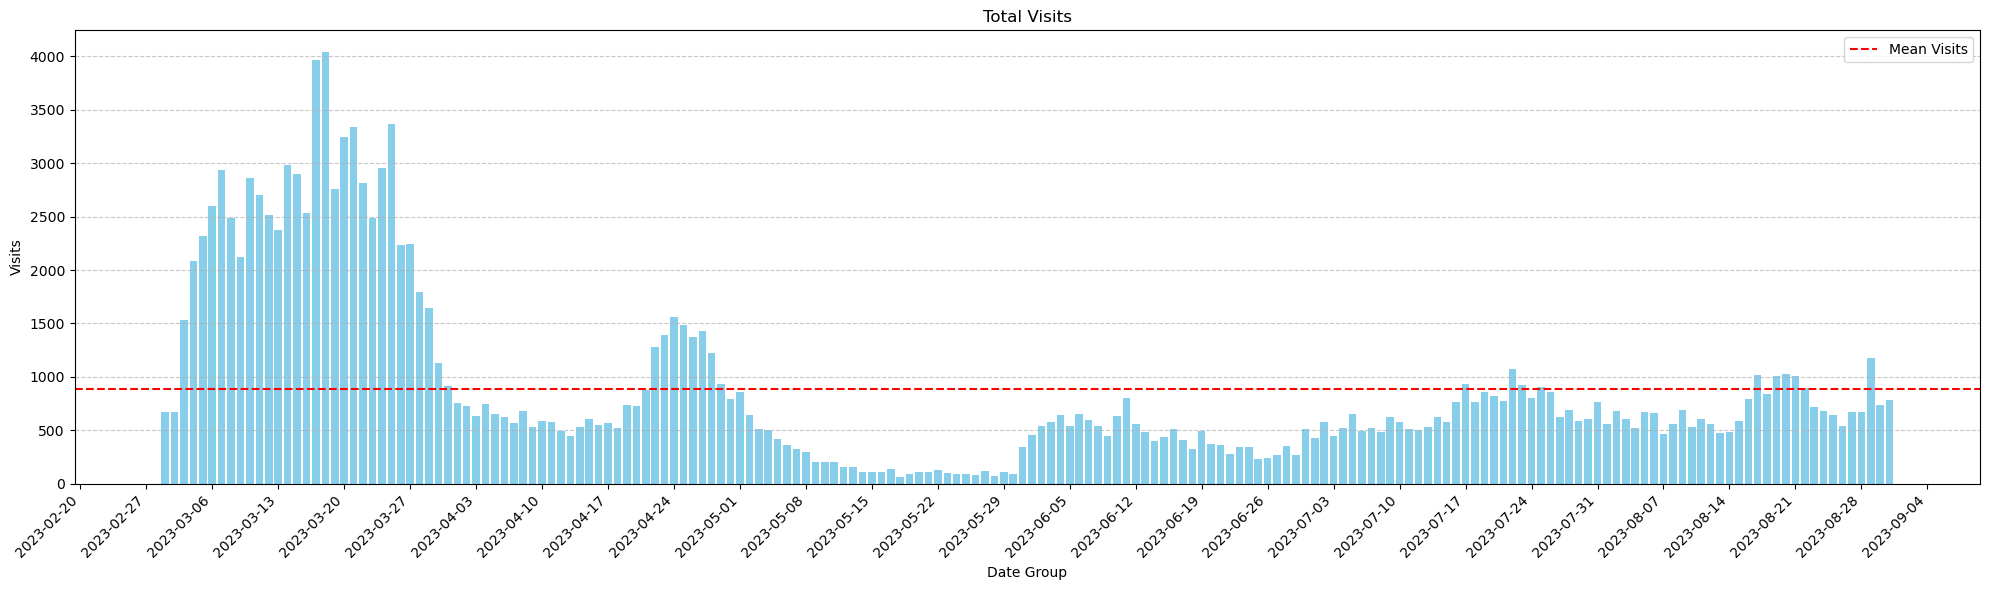

In [545]:
df_graf_visit_grouped = df_visit_grouped.copy()

result_df = df_graf_visit_grouped.groupby('date_group')['visits'].sum().reset_index()
result_df['date_group'] = pd.to_datetime(result_df['date_group'])

plt.figure(figsize=(20, 6))
plt.bar(result_df['date_group'], result_df['visits'], color='skyblue')

plt.xlabel('Date Group')
plt.ylabel('Visits')
plt.title('Total Visits')

mondays = WeekdayLocator(MONDAY)
plt.gca().xaxis.set_major_locator(mondays)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45, ha='right')

mean_value = result_df['visits'].mean()
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean Visits')

plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.legend()
plt.tight_layout()

plt.savefig('charts/total_visits_chart.png', bbox_inches='tight')

plt.show()

Итоговые визиты с разбивкой по платформам: web, android, ios, bot

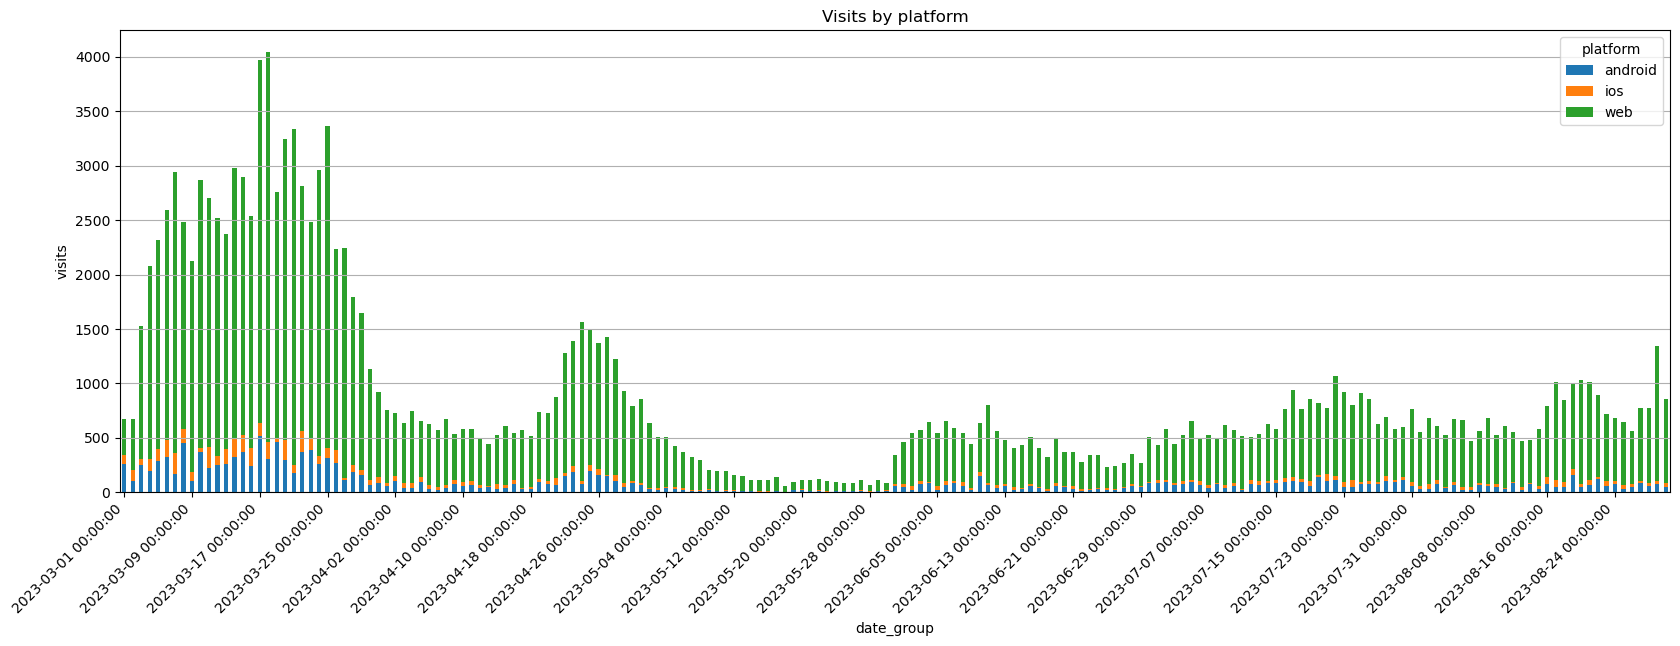

In [546]:
df_graf_visit_grouped_platform['date_group'] = pd.to_datetime(df_graf_visit_grouped_platform['date_group'])

fig, ax = plt.subplots(figsize=(20, 6))

df_graf_visit_grouped_platform.groupby(['date_group', 'platform']).sum()['visits'].unstack().plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('date_group')
ax.set_ylabel('visits')
ax.set_title('Visits by platform')

ax.legend(title='platform')

ax.yaxis.grid(True)

plt.xticks(rotation=45, ha='right')

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

plt.savefig('charts/total_visits_platform_chart.png', bbox_inches='tight')

plt.show()

Итоговые регистрации

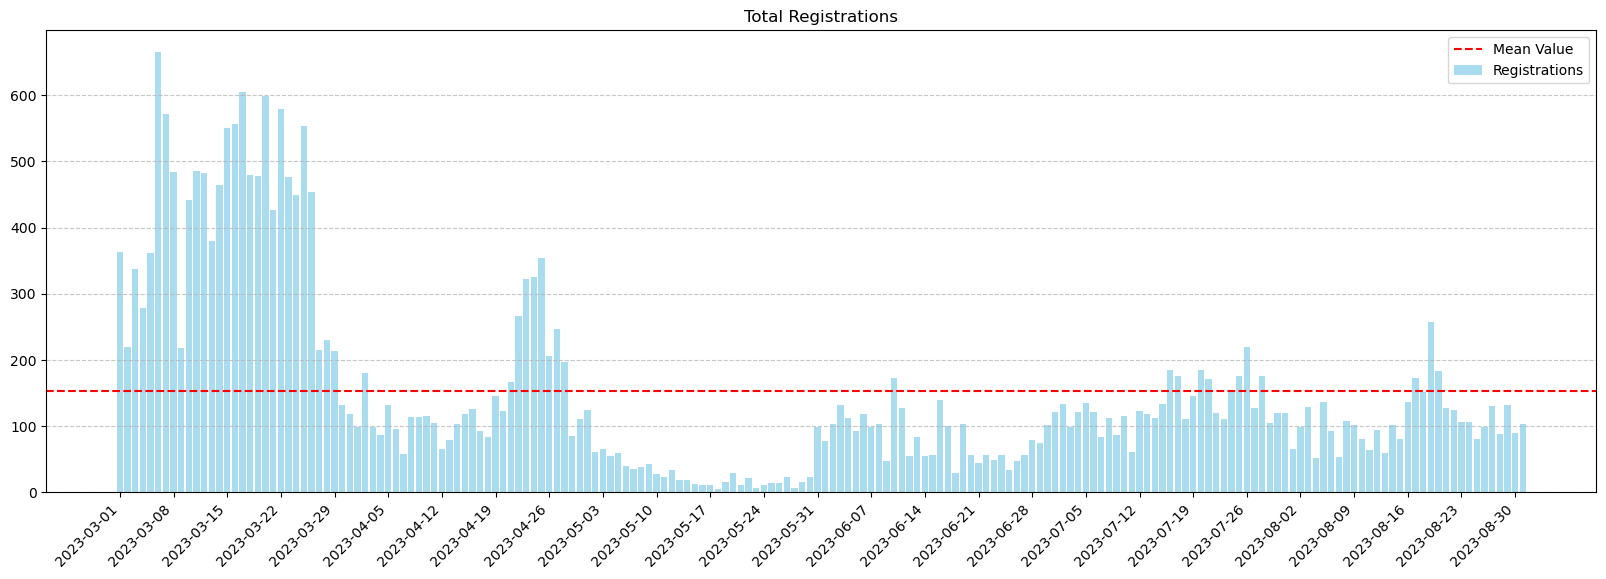

In [547]:
df_graf_registrations_grouped = df_registrations_grouped.copy()

df_graf_registrations_grouped = df_graf_registrations_grouped.groupby('date_group')['registrations'].sum().reset_index()

plt.figure(figsize=(20, 6))

plt.bar(df_graf_registrations_grouped['date_group'], df_graf_registrations_grouped['registrations'], color='skyblue', alpha=0.7, label='Registrations')

mean_value = df_graf_registrations_grouped['registrations'].mean()
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean Value')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Total Registrations')

plt.xticks(df_graf_registrations_grouped['date_group'][::7], rotation=45, ha='right')

plt.legend()

plt.savefig('charts/total_registrations_chart.png')

plt.show()


Итоговые регистрации с разбивкой по платформе: web, android, ios

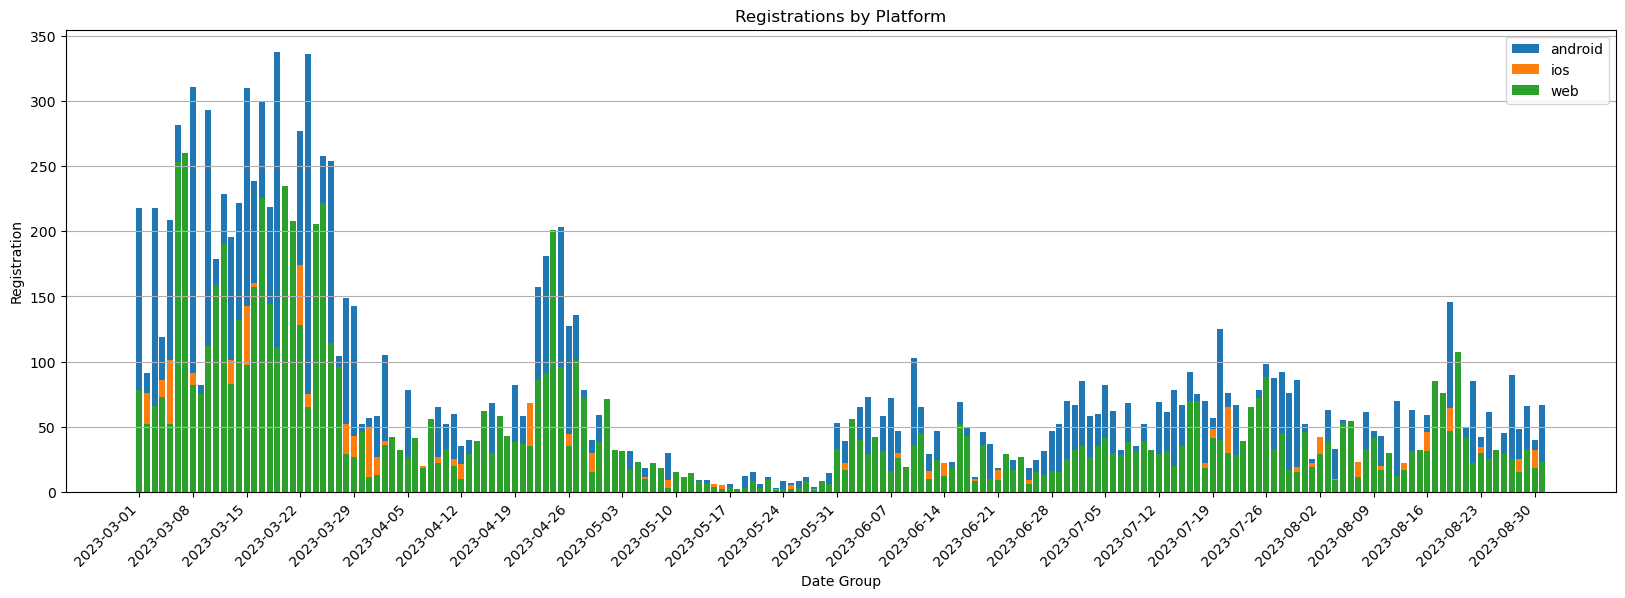

In [559]:
df_registrations_copy = df_registrations.copy(deep=True)

df_registrations_copy['date_group'] = pd.to_datetime(df_registrations_copy['datetime'], format='%a, %d %b %Y %H:%M:%S GMT').dt.strftime('%Y-%m-%d')

grouped_df = df_registrations_copy.groupby(['date_group', 'platform']).size().reset_index(name='registration')

fig, ax = plt.subplots(figsize=(20, 6))

for platform in grouped_df['platform'].unique():
    platform_data = grouped_df[grouped_df['platform'] == platform]
    ax.bar(platform_data['date_group'], platform_data['registration'], label=platform)

ax.set_xlabel('Date Group')
ax.set_ylabel('Registration')
ax.set_title('Registrations by Platform')
ax.legend()

ax.grid(True, axis='y')

x_labels = grouped_df['date_group'].unique()[::7]
ax.set_xticks(x_labels)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

plt.savefig('charts/total_registrations_platform_chart.png')

plt.show()

Итоговые регистрации с разбивкой по типу регистрации: email, google, apple, yandex

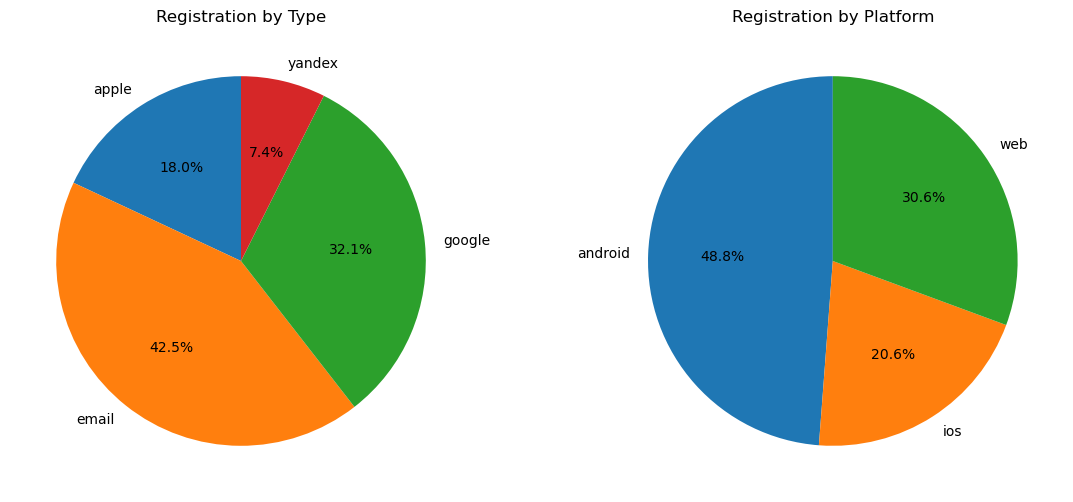

In [549]:
df_graf_registration_type_copy = df_registrations.copy(deep=True)
df_graf_registration_platform_copy = df_registrations.copy(deep=True)

df_graf_registration_type_copy = df_graf_registration_type_copy.groupby('registration_type').size().reset_index(name='registration')
df_graf_registration_platform_copy = df_graf_registration_platform_copy.groupby('platform').size().reset_index(name='registration')

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].pie(df_graf_registration_type_copy['registration'], labels=df_graf_registration_type_copy['registration_type'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Registration by Type')

ax[1].pie(df_graf_registration_platform_copy['registration'], labels=df_graf_registration_platform_copy['platform'], autopct='%1.1f%%', startangle=90)
ax[1].set_title('Registration by Platform')

plt.savefig('charts/registration_type_platform_chart.png')

plt.show()

Конверсия по каждой платформе

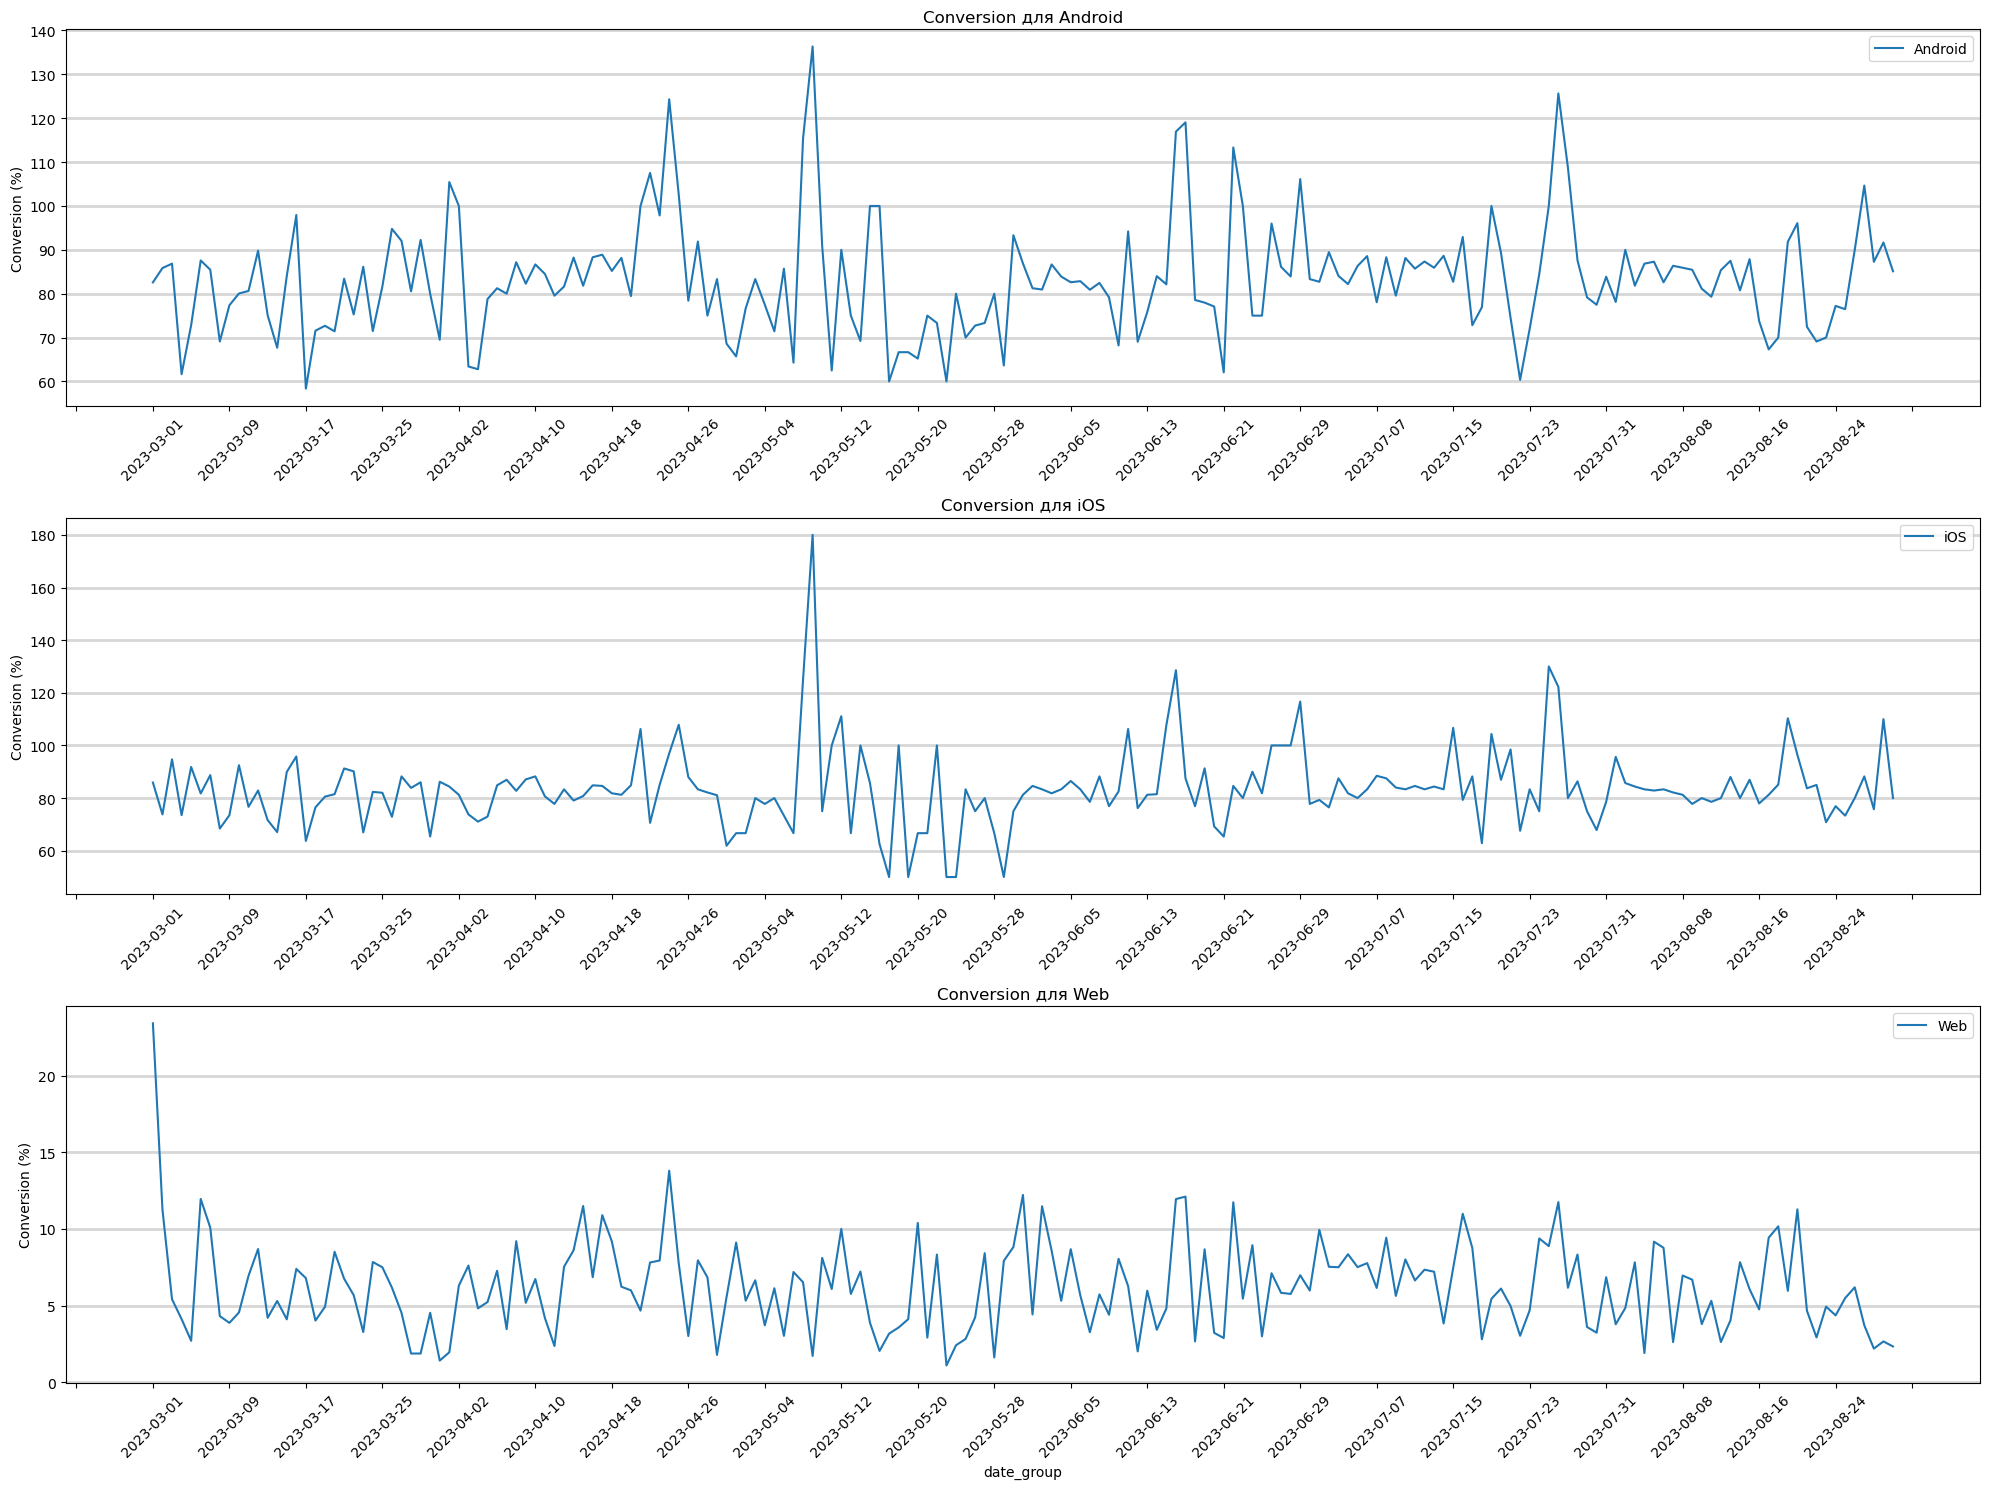

In [550]:
android_data = df_conversion_copy[df_conversion_copy['platform'] == 'android']
ios_data = df_conversion_copy[df_conversion_copy['platform'] == 'ios']
web_data = df_conversion_copy[df_conversion_copy['platform'] == 'web']

fig, axs = plt.subplots(3, 1, figsize=(20, 15), sharex=False, sharey=False)

axs[0].plot(android_data['date_group'], android_data['conversion'], label='Android')
axs[0].set_title('Conversion для Android')
axs[0].set_ylabel('Conversion (%)')
axs[0].legend()
axs[0].grid(True, linestyle='-', linewidth=2, alpha=0.5, which='both', axis='y', markevery=2)  # Увеличиваем размер сетки
axs[0].tick_params(axis='x', rotation=45)  # Поворот меток оси x
axs[0].xaxis.set_major_locator(plt.MaxNLocator(nbins=30))  # Установка количества меток

axs[1].plot(ios_data['date_group'], ios_data['conversion'], label='iOS')
axs[1].set_title('Conversion для iOS')
axs[1].set_ylabel('Conversion (%)')
axs[1].legend()
axs[1].grid(True, linestyle='-', linewidth=2, alpha=0.5, which='both', axis='y', markevery=2)  # Увеличиваем размер сетки
axs[1].tick_params(axis='x', rotation=45)  # Поворот меток оси x
axs[1].xaxis.set_major_locator(plt.MaxNLocator(nbins=30))  # Установка количества меток

axs[2].plot(web_data['date_group'], web_data['conversion'], label='Web')
axs[2].set_title('Conversion для Web')
axs[2].set_xlabel('date_group')
axs[2].set_ylabel('Conversion (%)')
axs[2].legend()
axs[2].grid(True, linestyle='-', linewidth=2, alpha=0.5, which='both', axis='y', markevery=2)  # Увеличиваем размер сетки
axs[2].tick_params(axis='x', rotation=45)  # Поворот меток оси x
axs[2].xaxis.set_major_locator(plt.MaxNLocator(nbins=30))  # Установка количества меток

plt.tight_layout()

plt.savefig('charts/conversion_platform_chart.png')

plt.show()

Средняя конверсия
<span style="color:red;">(Общая)</span>


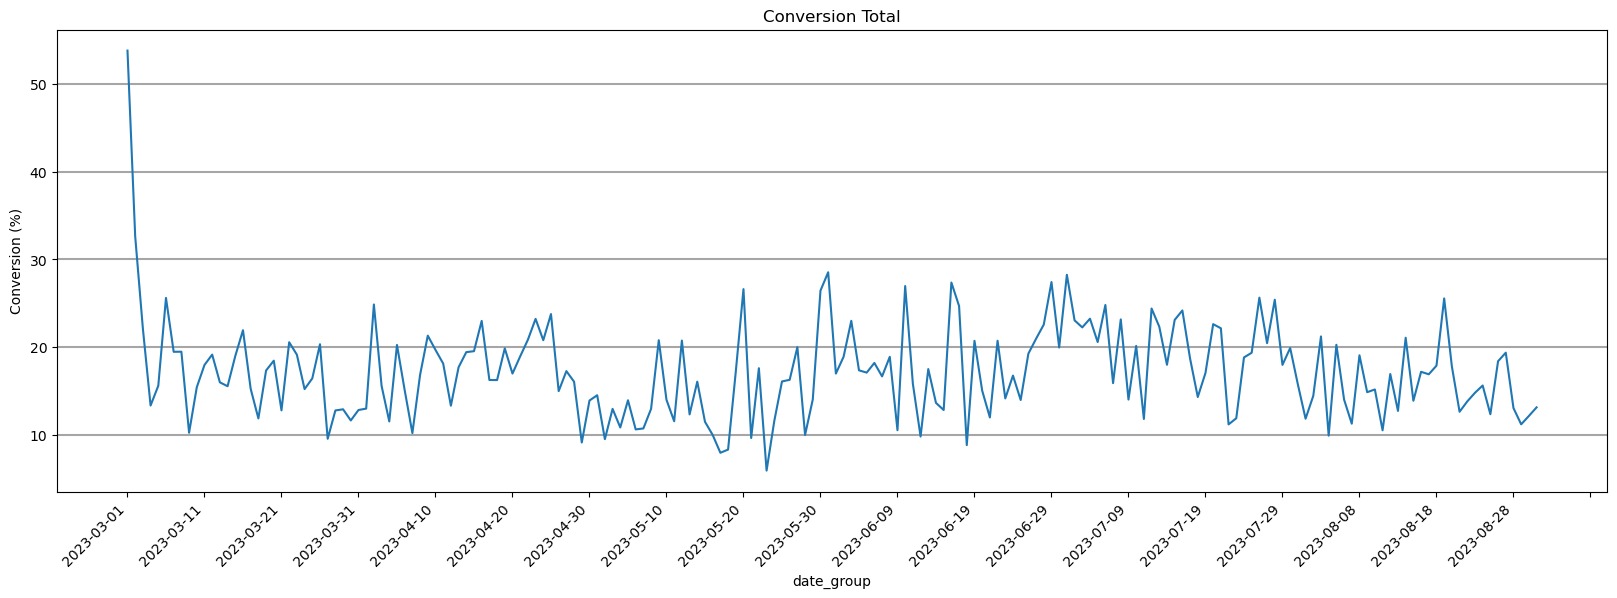

In [551]:
df_conversion_total = df_conversion.copy(deep=True)

grouped_df = df_conversion_total.groupby('date_group').agg({'visits': 'sum', 'registrations': 'sum'})

grouped_df['conversion'] = (grouped_df['registrations'] / grouped_df['visits'] * 100).round(2)

plt.figure(figsize=(20, 6))
plt.plot(grouped_df.index, grouped_df['conversion'], linestyle='-')

plt.title('Conversion Total')
plt.xlabel('date_group')
plt.ylabel('Conversion (%)')

plt.xticks(df_graf_registrations_grouped['date_group'][::7], rotation=45, ha='right')

plt.grid(which='major', axis='y', linestyle='-', linewidth=1.5, color='gray', alpha=0.7)

plt.gca().xaxis.set_major_locator(MultipleLocator(10))

plt.savefig('charts/conversion_total_chart.png')

plt.show()

Стоимости реклам

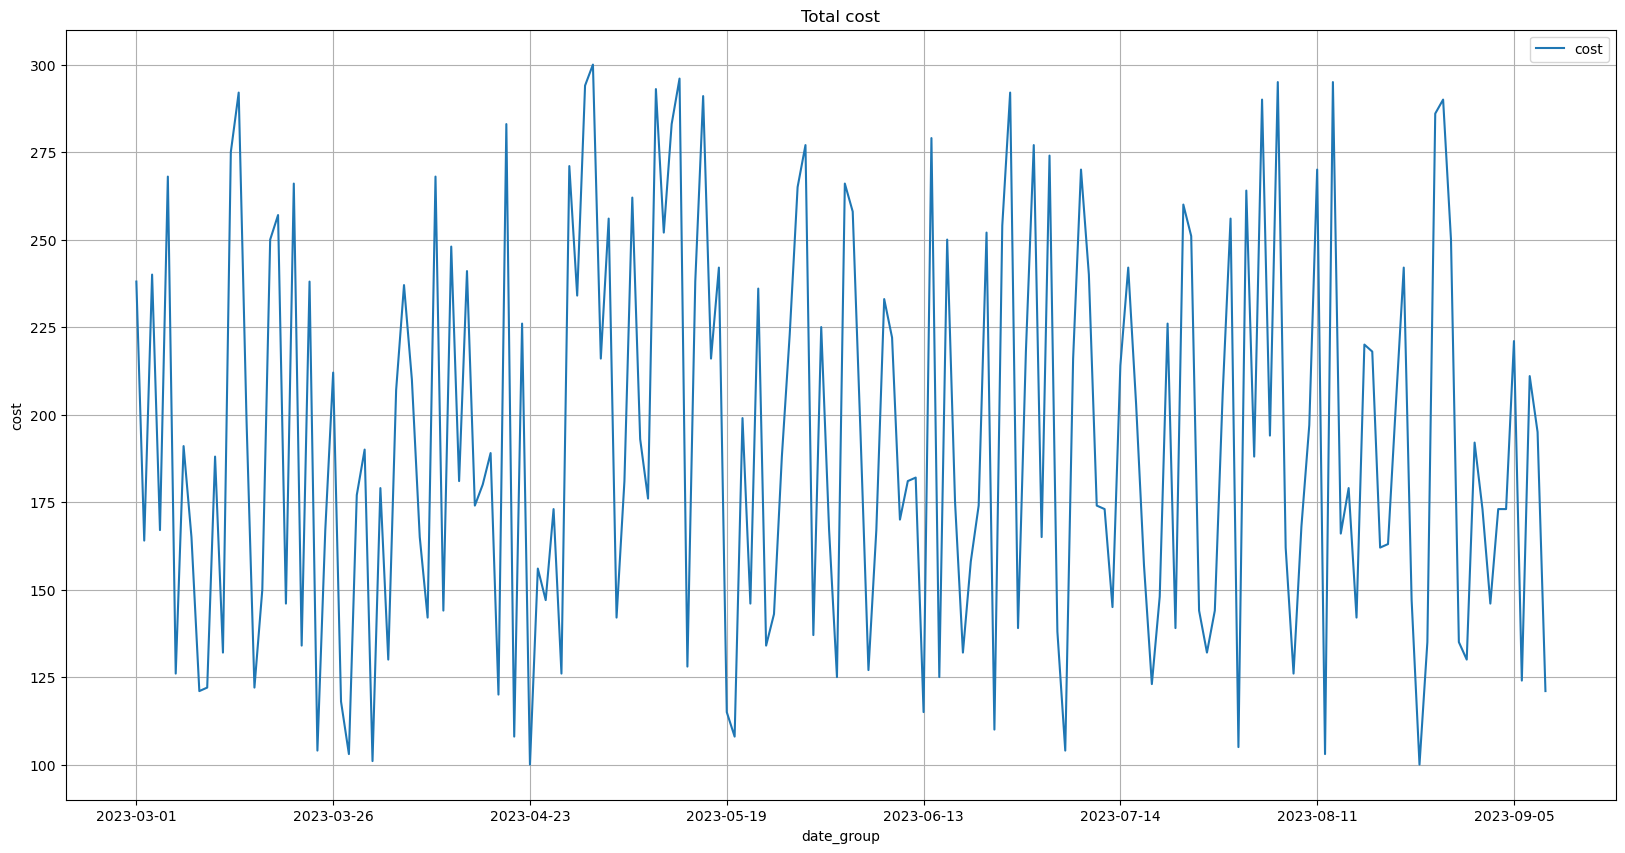

In [552]:
df_ads_total = df_ads.copy(deep=True)

df_ads_total = df_ads_total.groupby('date_group')['cost'].sum().reset_index()

df_ads_total.plot(x='date_group', y='cost', kind='line', linestyle='-', figsize=(20, 10))

plt.title('Total cost')
plt.xlabel('date_group')
plt.ylabel('cost')
plt.grid(True)

plt.savefig('charts/cost_total_chart.png')

plt.show()

Визиты за весь период с цветовым выделением рекламной кампании

Регистрации за весь период с цветовым выделением рекламной кампании

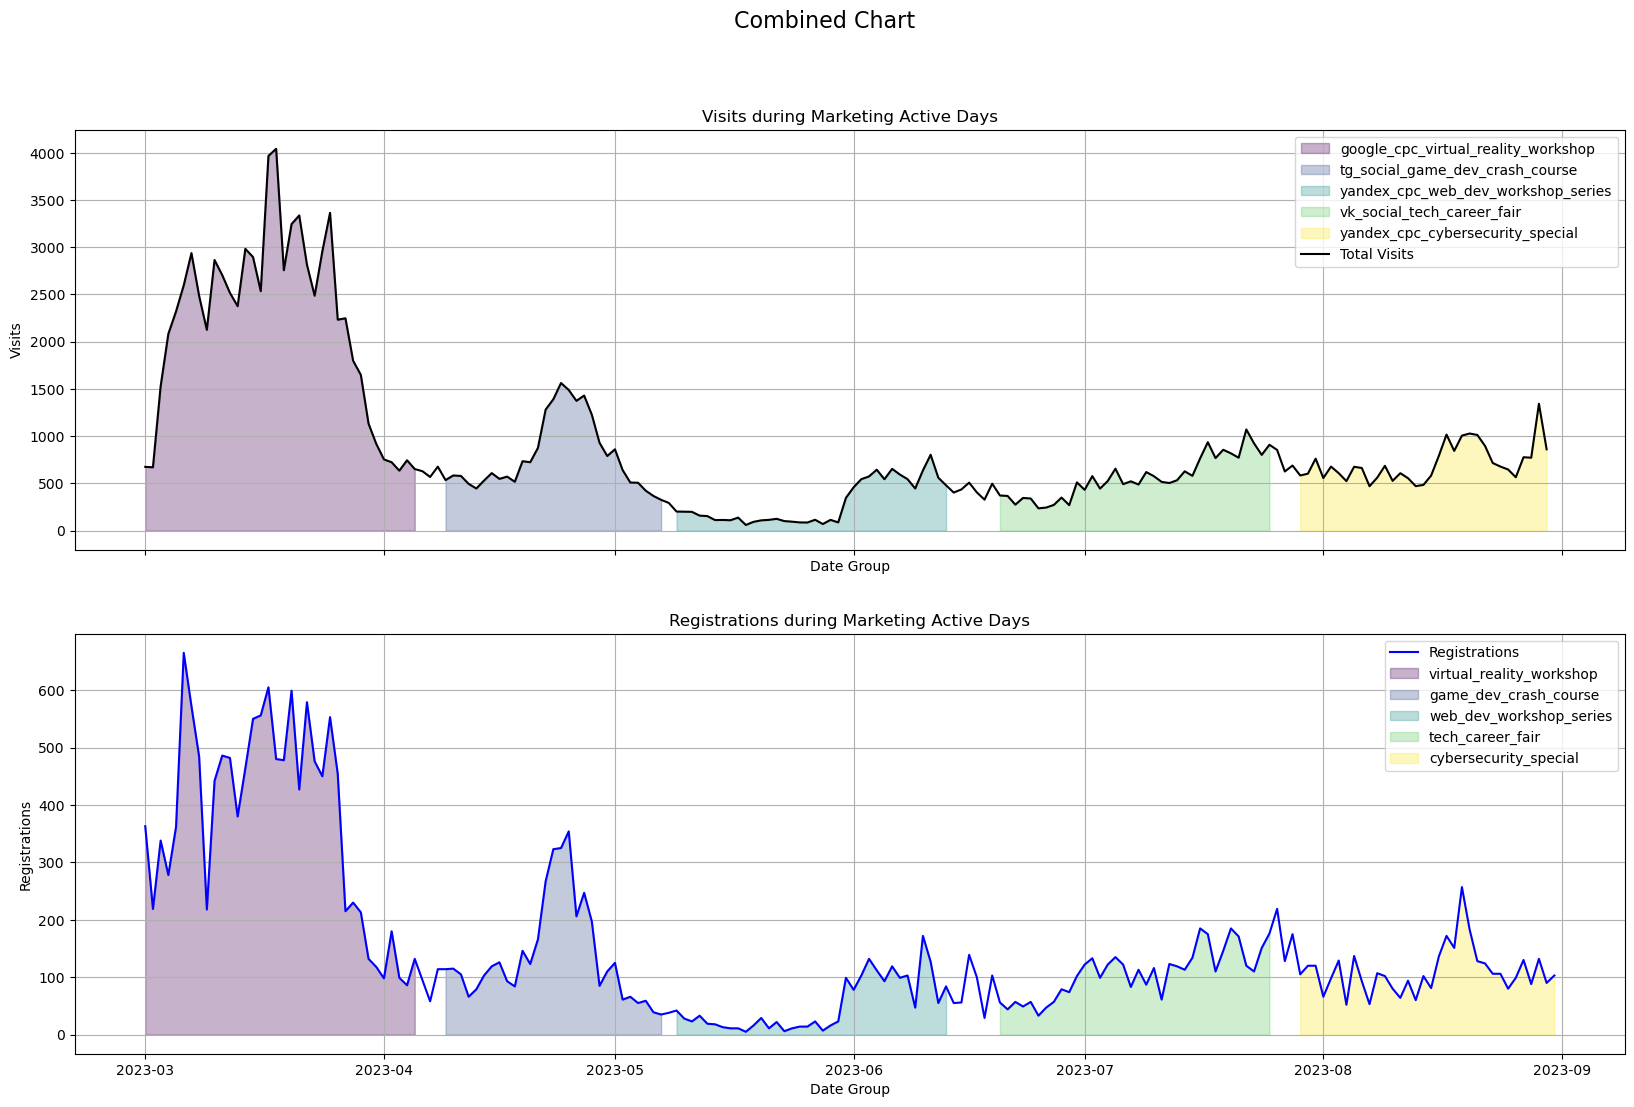

In [560]:
df_registrations_group_1 = df_registrations.copy(deep=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

unique_campaigns = df_ads_group_1['campaign'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_campaigns)))

merged_data = pd.merge(result_df_1, df_ads_group_1, how='left', on='date_group')

for i, campaign in enumerate(unique_campaigns):
    campaign_data = merged_data[merged_data['campaign'] == campaign]
    
    x_values = np.array(campaign_data['date_group'])
    y_values = np.array(campaign_data['visits'].fillna(0))
    
    ax1.fill_between(x_values, y_values, color=colors[i], alpha=0.3, label=f"{campaign_data['utm_source'].iloc[0]}_{campaign_data['utm_medium'].iloc[0]}_{campaign}")

ax1.plot(result_df_1['date_group'], result_df_1['visits'], linestyle='-', label='Total Visits', color='black')

ax1.set_xlabel('Date Group')
ax1.set_ylabel('Visits')
ax1.set_title('Visits during Marketing Active Days')

ax1.legend()
ax1.grid(True)

df_registrations_group_1 = df_registrations.copy(deep=True)

df_registrations_group_1['datetime'] = pd.to_datetime(df_registrations_group_1['datetime'], format='%a, %d %b %Y %H:%M:%S %Z')
df_registrations_group_1['date_group'] = df_registrations_group_1['datetime'].dt.strftime('%Y-%m-%d')
df_registrations_group_2 = df_registrations_group_1
result_df = df_registrations_group_2.groupby('date_group').size().reset_index(name='registration')
result_df = pd.DataFrame(result_df)
result_df['date_group'] = pd.to_datetime(result_df['date_group'])
result_df = result_df.sort_values(by='date_group')

df_ads_group_1 = df_ads.copy(deep=True)
df_ads_group_1['date_group'] = pd.to_datetime(df_ads_group_1['date_group'])
df_ads_group_1 = df_ads_group_1.groupby(['date_group', 'utm_source', 'utm_medium', 'campaign'])['cost'].sum().reset_index()

df_ads_group_1 = df_ads_group_1.sort_values(by='date_group')

df_ads_group_1 = df_ads_group_1[df_ads_group_1['date_group'].isin(result_df['date_group'])]

campaign_colors = plt.cm.viridis(np.linspace(0, 1, len(df_ads_group_1['campaign'].unique())))

ax2.plot(result_df['date_group'], result_df['registration'], label='Registrations', color='blue')

for i, campaign in enumerate(df_ads_group_1['campaign'].unique()):
    campaign_data = df_ads_group_1[df_ads_group_1['campaign'] == campaign]
    where_condition = result_df['date_group'].isin(campaign_data['date_group'])
    ax2.fill_between(result_df['date_group'], 0, result_df['registration'],
                     where=np.concatenate([where_condition, [False] * (len(result_df) - len(where_condition))]),
                     color=campaign_colors[i], alpha=0.3, label=campaign)

ax2.set_xlabel('Date Group')
ax2.set_ylabel('Registrations')
ax2.set_title('Registrations during Marketing Active Days')

ax2.legend()
ax2.grid(True)

fig.suptitle('Combined Chart', fontsize=16)

plt.savefig('charts/combined_chart.png')

plt.show()
